In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import spearmanr


%matplotlib inline  

df_customers = pd.read_csv("Fecom Inc Customer List.csv", sep=';')
df_order_items = pd.read_csv("Fecom Inc Order Items.csv", sep=';')
df_order_payments = pd.read_csv("Fecom Inc Order Payments.csv", sep=';')
df_orders = pd.read_csv("Fecom Inc Orders.csv", sep=';')
df_products = pd.read_csv("Fecom Inc Products.csv", sep=';')
df_sellers = pd.read_csv("Fecom Inc Sellers List.csv", sep=';')
df_reviews = pd.read_csv('Fecom_Inc_Order_Reviews_No_Emojis.csv', sep=';')

df_merged = (
    df_orders
    .merge(df_customers, on="Customer_Trx_ID", how='inner')
    .merge(df_order_items, on="Order_ID", how='inner')
    .merge(df_products, on="Product_ID", how='inner')
    .merge(df_sellers, on="Seller_ID", how='inner')
    .merge(df_reviews, on="Order_ID", how='inner')
    .merge(df_order_payments, on="Order_ID", how='inner')
)

In [2]:
df_merged.columns


Index(['Order_ID', 'Customer_Trx_ID', 'Order_Status',
       'Order_Purchase_Timestamp', 'Order_Approved_At',
       'Order_Delivered_Carrier_Date', 'Order_Delivered_Customer_Date',
       'Order_Estimated_Delivery_Date', 'Subscriber_ID', 'Subscribe_Date',
       'First_Order_Date', 'Customer_Postal_Code', 'Customer_City',
       'Customer_Country', 'Customer_Country_Code', 'Age', 'Gender',
       'Order_Item_ID', 'Product_ID', 'Seller_ID', 'Shipping_Limit_Date',
       'Price', 'Freight_Value', 'Product_Category_Name', 'Product_Weight_Gr',
       'Product_Length_Cm', 'Product_Height_Cm', 'Product_Width_Cm',
       'Seller_Name', 'Seller_Postal_Code', 'Seller_City', 'Country_Code',
       'Seller_Country', 'Review_ID', 'Review_Score',
       'Review_Comment_Title_En', 'Review_Comment_Message_En',
       'Review_Creation_Date', 'Review_Answer_Timestamp', 'Payment_Sequential',
       'Payment_Type', 'Payment_Installments', 'Payment_Value'],
      dtype='object')

In [3]:
df_merged.head()

,Order_ID,Customer_Trx_ID,Order_Status,Order_Purchase_Timestamp,Order_Approved_At,Order_Delivered_Carrier_Date,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date,Subscriber_ID,Subscribe_Date,...,Review_ID,Review_Score,Review_Comment_Title_En,Review_Comment_Message_En,Review_Creation_Date,Review_Answer_Timestamp,Payment_Sequential,Payment_Type,Payment_Installments,Payment_Value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2023 10:56,02/10/2023 11:07,04/10/2023 19:55,10/10/2023 21:25,18/10/2023 00:00,7c396fd4830fd04220f754e42b4e5bff,2023-08-06,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"I haven't tested the product yet, but it arriv...",2023-10-11 00:00,2023-10-12 03:43,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2023 10:56,02/10/2023 11:07,04/10/2023 19:55,10/10/2023 21:25,18/10/2023 00:00,7c396fd4830fd04220f754e42b4e5bff,2023-08-06,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"I haven't tested the product yet, but it arriv...",2023-10-11 00:00,2023-10-12 03:43,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2023 10:56,02/10/2023 11:07,04/10/2023 19:55,10/10/2023 21:25,18/10/2023 00:00,7c396fd4830fd04220f754e42b4e5bff,2023-08-06,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"I haven't tested the product yet, but it arriv...",2023-10-11 00:00,2023-10-12 03:43,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2024 20:41,26/07/2024 03:24,26/07/2024 14:31,07/08/2024 15:27,13/08/2024 00:00,af07308b275d755c9edb36a90c618231,2024-07-12,...,8d5266042046a06655c8db133d120ba5,4,Very good store,Very good product.,2024-08-08 00:00,2024-08-08 18:37,1,debit_card,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2024 08:38,08/08/2024 08:55,08/08/2024 13:50,17/08/2024 18:06,04/09/2024 00:00,3a653a41f6f9fc3d2a113cf8398680e8,2024-07-24,...,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2024-08-18 00:00,2024-08-22 19:07,1,credit_card,3,179.12


In [64]:
df = df_merged.drop(['Customer_Trx_ID', 'Order_ID', 'Seller_ID', 'Subscriber_ID', 'Subscribe_Date', 'Order_Item_ID', 'First_Order_Date', 'Order_Approved_At','Order_Delivered_Carrier_Date', 'Customer_Postal_Code', 'Customer_City', 'Review_ID', 
                     'Review_Comment_Title_En', 'Review_Creation_Date', 'Review_Comment_Message_En','Review_Answer_Timestamp', 'Payment_Sequential', 
                     'Seller_Postal_Code','Seller_City', 'Seller_Postal_Code','Payment_Installments'], axis=1)
df.columns

Index(['Order_Status', 'Order_Purchase_Timestamp',
       'Order_Delivered_Customer_Date', 'Order_Estimated_Delivery_Date',
       'Customer_Country', 'Customer_Country_Code', 'Age', 'Gender',
       'Product_ID', 'Shipping_Limit_Date', 'Price', 'Freight_Value',
       'Product_Category_Name', 'Product_Weight_Gr', 'Product_Length_Cm',
       'Product_Height_Cm', 'Product_Width_Cm', 'Seller_Name', 'Country_Code',
       'Seller_Country', 'Review_Score', 'Payment_Type', 'Payment_Value'],
      dtype='object')

**Let's handle missing values**  
First of all we are gonna check in which columns we have NA values and we're gonna treat them depending by the type of variable


In [66]:
def columns_with_missing_values(df):
    missing_columns = df.columns[df.isnull().any()].tolist()
    if missing_columns:
        print("Columns with missing values:")
        for col in missing_columns:
            print(f"- {col}")
    else:
        print("No columns contain missing values.")


In [68]:
columns_with_missing_values(df)


Columns with missing values:
- Order_Delivered_Customer_Date
- Product_Category_Name
- Product_Weight_Gr
- Product_Length_Cm
- Product_Height_Cm
- Product_Width_Cm


In [72]:
n_null = df.isnull().sum()
#print(f"Number of missing values:{n_null}")

p_null = (df.isnull().mean() * 100).round(2)

summary_null = pd.DataFrame({
    'Missing #': n_null,
    'Missing %': p_null
}).sort_values(by='Missing %', ascending=False)

print(summary_null)

                               Missing #  Missing %
Order_Delivered_Customer_Date       2471       2.11
Product_Category_Name               1720       1.47
Product_Width_Cm                      20       0.02
Product_Height_Cm                     20       0.02
Product_Length_Cm                     20       0.02
Product_Weight_Gr                     20       0.02
Order_Status                           0       0.00
Payment_Type                           0       0.00
Review_Score                           0       0.00
Seller_Country                         0       0.00
Country_Code                           0       0.00
Seller_Name                            0       0.00
Freight_Value                          0       0.00
Order_Purchase_Timestamp               0       0.00
Price                                  0       0.00
Shipping_Limit_Date                    0       0.00
Product_ID                             0       0.00
Gender                                 0       0.00
Age         

In [74]:
#ok so we have to handle the missing values for this columns

#Convert date columns to datetime, keep NaT for missing
df['Order_Delivered_Customer_Date'] = pd.to_datetime(df['Order_Delivered_Customer_Date'], errors='coerce') #coerce is usefull because if we have a missing date it'll become 'Nat'= Not a Time
df1 = df.copy().dropna(subset=['Order_Delivered_Customer_Date'])

#Fill categorical missing values with 'unknown'
df1.loc[:,'Product_Category_Name'] = df1['Product_Category_Name'].fillna("Unknown")

#Fill numeric missing values with median
num_cols = ['Product_Weight_Gr', 'Product_Length_Cm', 'Product_Height_Cm', 'Product_Width_Cm']
for col in num_cols:
    df1.loc[:,col] = df1[col].fillna(df1[col].median())


In [75]:
df1.isnull().sum()

Order_Status                     0
Order_Purchase_Timestamp         0
Order_Delivered_Customer_Date    0
Order_Estimated_Delivery_Date    0
Customer_Country                 0
Customer_Country_Code            0
Age                              0
Gender                           0
Product_ID                       0
Shipping_Limit_Date              0
Price                            0
Freight_Value                    0
Product_Category_Name            0
Product_Weight_Gr                0
Product_Length_Cm                0
Product_Height_Cm                0
Product_Width_Cm                 0
Seller_Name                      0
Country_Code                     0
Seller_Country                   0
Review_Score                     0
Payment_Type                     0
Payment_Value                    0
dtype: int64

**Now we'll create features that can be useful for some insights**,  
in particular Is_late, Has_Left_Review, Gave_Low_Score, Age_class, Avg delivery
time

In [79]:
df1['Order_Delivered_Customer_Date'] = pd.to_datetime(df1['Order_Delivered_Customer_Date'], dayfirst=True).dt.normalize()
df1['Order_Estimated_Delivery_Date'] = pd.to_datetime(df1['Order_Estimated_Delivery_Date'], dayfirst=True).dt.normalize()
df1['Order_Purchase_Timestamp'] = pd.to_datetime(df1['Order_Purchase_Timestamp'], dayfirst=True).dt.normalize()

In [80]:
#if an order arrived after the estimated delivery date it will be marked as True in the variable 'is_late'
df1['Is_late'] = (df1['Order_Delivered_Customer_Date'] > df1['Order_Estimated_Delivery_Date']).astype(int)

#the customer will have a True value in the variables 'Has_left_review' and 'Gave_Low_Score' if 'Review_Score' is not null and if the
#'Review_Score' is below 2
df1['Has_left_review'] = np.where(df1['Review_Score'].isnull(), 0, 1)
df1['Gave_Low_Score'] = df1['Review_Score'].fillna(0) <= 2

#we divide the clients based on their age in three classes
def age_group(age):
    if pd.isna(age):
        return 'Unknown'
    elif age <= 25:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df1['Age_group'] = df1['Age'].apply(age_group)

#we find the delivery time days as the difference of the date of delivery and the date of purchase
df1 = df1[df1['Order_Delivered_Customer_Date'] >= df1['Order_Purchase_Timestamp']]
df1['Delivery_Time_Days'] = (df1['Order_Delivered_Customer_Date'] - df1['Order_Purchase_Timestamp']).dt.days

#we find for each pairs of seller country and cunstomer country the mean of the delivery time days 
avg_delivery = df1.groupby(['Seller_Country', 'Customer_Country'])['Delivery_Time_Days'].mean().reset_index()
avg_delivery.rename(columns={'Delivery_Time_Days': 'Avg_delivery_time'}, inplace=True)
df1 = df1.merge(avg_delivery, on=['Seller_Country', 'Customer_Country'], how='left')


'Has_left_review' is a constant column, not needed since we do not have missing values for review score

In [86]:
df1.head()

,Order_Status,Order_Purchase_Timestamp,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date,Customer_Country,Customer_Country_Code,Age,Gender,Product_ID,Shipping_Limit_Date,...,Seller_Country,Review_Score,Payment_Type,Payment_Value,Is_late,Has_left_review,Gave_Low_Score,Age_group,Delivery_Time_Days,Avg_delivery_time
0,delivered,2023-10-02,2023-10-10,2023-10-18,Germany,DE,23,Male,87285b34884572647811a353c7ac498a,2023-10-06 11:07,...,Germany,4,credit_card,18.12,0,1,False,Young,8,118.049326
1,delivered,2023-10-02,2023-10-10,2023-10-18,Germany,DE,23,Male,87285b34884572647811a353c7ac498a,2023-10-06 11:07,...,Germany,4,voucher,2.00,0,1,False,Young,8,118.049326
2,delivered,2023-10-02,2023-10-10,2023-10-18,Germany,DE,23,Male,87285b34884572647811a353c7ac498a,2023-10-06 11:07,...,Germany,4,voucher,18.59,0,1,False,Young,8,118.049326
3,delivered,2023-01-23,2023-02-02,2023-03-06,Belgium,BE,50,Female,ac1789e492dcd698c5c10b97a671243a,2023-01-27 18:29,...,Germany,1,debit_card,35.95,0,1,True,Adult,10,124.721557
4,delivered,2024-03-01,2024-12-03,2024-03-21,Germany,DE,36,Male,72d3bf1d3a790f8874096fcf860e3eff,2024-03-07 15:10,...,Germany,4,credit_card,54.36,1,1,False,Adult,277,118.049326


**Data analysis and visualization**

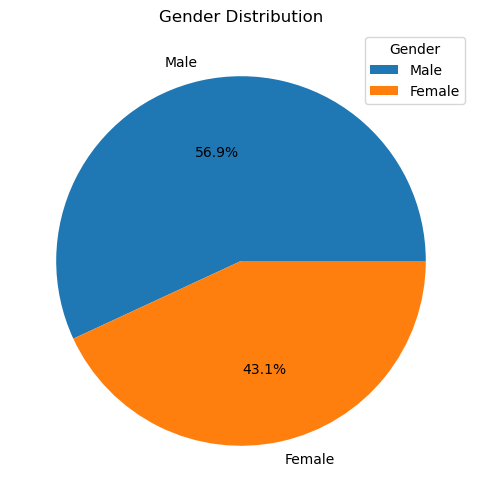

In [89]:
genders = df1['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.legend(title="Gender", loc="best")  


Text(0, 0.5, '% of Total Customers')

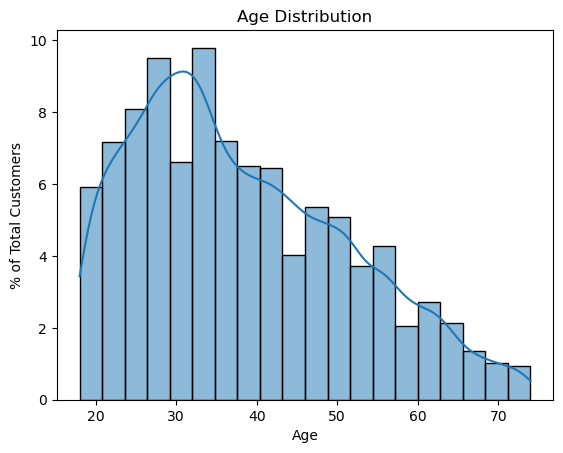

In [91]:
sns.histplot(x='Age', data=df1, bins=20, kde=True, stat='percent')
plt.title("Age Distribution")
plt.ylabel("% of Total Customers")


In [93]:
# plt.figure(figsize=(10,5))
# sns.countplot(x='Customer_Country', data=df1)
# plt.xticks(rotation=45)

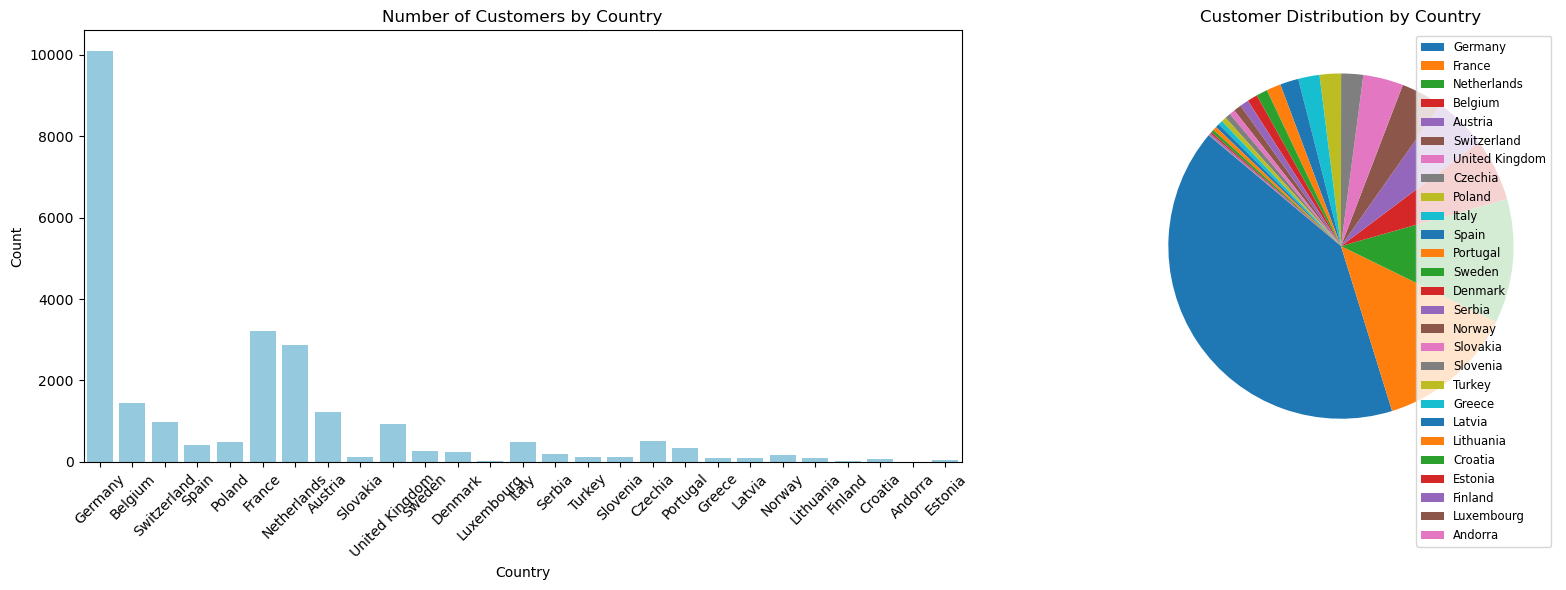

In [97]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Customer_Country', data=df1,  color='skyblue')
plt.xticks(rotation=45)
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(df1['Customer_Country'].value_counts().values, startangle=140) 
plt.title('Customer Distribution by Country')
plt.legend(df1['Customer_Country'].value_counts().index, loc='best', fontsize='small') 

plt.tight_layout()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Belgium'),
  Text(4, 0, 'Austria'),
  Text(5, 0, 'Switzerland'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'Czechia'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'Italy')])

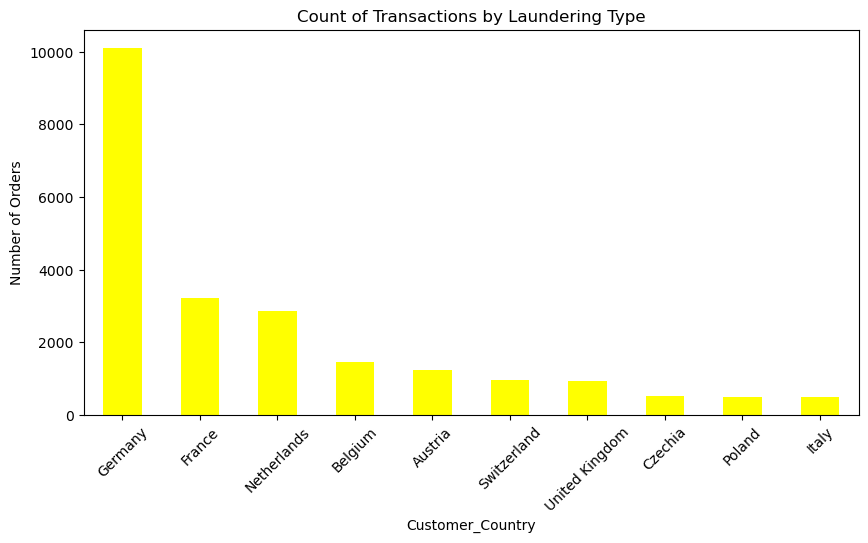

In [99]:
plt.figure(figsize=(10,5))
df1['Customer_Country'].value_counts().head(10).plot(kind='bar', color='yellow')
plt.title("Top 10 Customer Countries")
plt.ylabel("Number of Orders")
plt.title('Count of Transactions by Laundering Type')
plt.xticks(rotation=45)

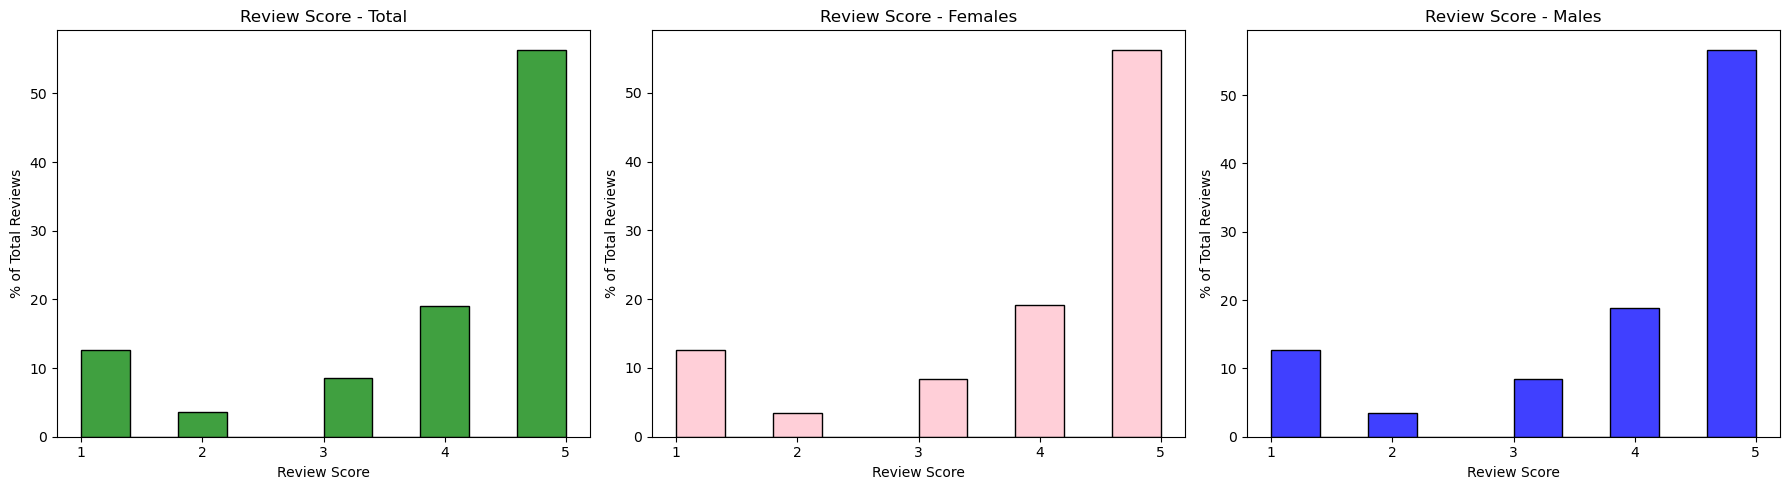

In [101]:
# Review score
plt.figure(figsize=(18,5))

#Subplot for Review score without specifing gender
plt.subplot(1, 3, 1)
sns.histplot(df1['Review_Score'], bins=10, kde=False, color='green', stat='percent')
plt.xticks([1, 2, 3, 4, 5])
plt.title("Review Score - Total")
plt.xlabel("Review Score")
plt.ylabel("% of Total Reviews")

#Subplot for females
plt.subplot(1, 3, 2)
sns.histplot(df[df['Gender'] == 'Female']['Review_Score'], bins=10, kde=False, color='pink', stat='percent')
plt.xticks([1, 2, 3, 4, 5])
plt.title("Review Score - Females")
plt.xlabel("Review Score")
plt.ylabel("% of Total Reviews")
plt.subplot(1, 3, 3)

#subplot for males
sns.histplot(df[df['Gender'] == 'Male']['Review_Score'], bins=10, kde=False, color='blue', stat='percent')
plt.xticks([1, 2, 3, 4, 5])
plt.title("Review Score - Males")
plt.xlabel("Review Score")
plt.ylabel("% of Total Reviews")

plt.tight_layout()



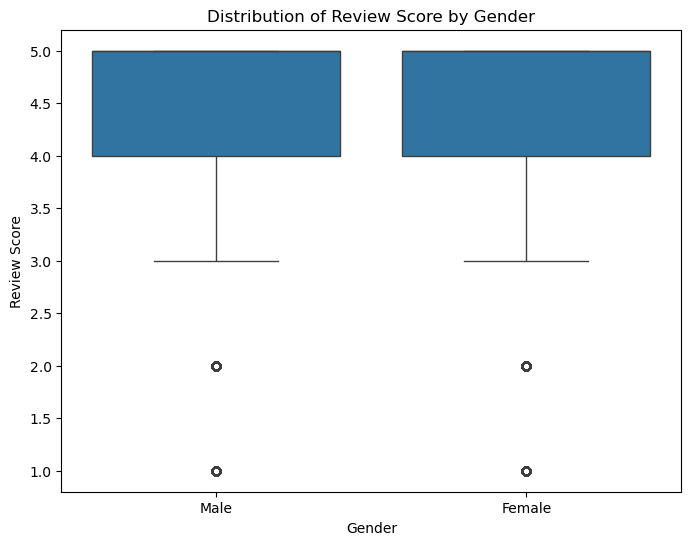

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Gender', y='Review_Score')
plt.title('Distribution of Review Score by Gender')
plt.ylabel('Review Score')
plt.xlabel('Gender')
plt.show()


In [105]:
average_scores = df1.groupby('Gender')['Review_Score'].mean()
print(average_scores)

Gender
Female    4.021721
Male      4.036175
Name: Review_Score, dtype: float64


By observing the boxplots divided by gender for the review scores, we confirm that the average customer rating is very high, but there does not appear to be a visible difference in ratings between genders. In fact, looking at the numerical averages, they are practically the same: males gave an average rating of 4.036175, while females gave an average of 4.021721.

In [109]:
df1.describe()

,Order_Purchase_Timestamp,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date,Age,Price,Freight_Value,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm,Review_Score,Payment_Value,Is_late,Has_left_review,Delivery_Time_Days,Avg_delivery_time
count,24678,24678,24678,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.000000,24678.0,24678.000000,24678.000000
mean,2024-01-01 00:55:33.041575424,2024-05-01 19:00:56.892779008,2024-01-26 18:38:07.964989184,38.216265,121.035215,20.099884,2140.320812,30.259219,16.594295,23.088459,4.029946,171.824137,0.851852,1.0,121.753748,121.753748
min,2022-10-04 00:00:00,2022-10-11 00:00:00,2022-11-24 00:00:00,18.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.0,0.000000,4.000000
25%,2023-09-16 00:00:00,2023-12-06 00:00:00,2023-10-11 00:00:00,28.000000,39.990000,13.140000,300.000000,18.000000,8.000000,15.000000,4.000000,60.990000,1.000000,1.0,62.000000,118.049326
50%,2024-02-09 00:00:00,2024-07-01 00:00:00,2024-03-09 00:00:00,36.000000,74.900000,16.350000,700.000000,25.000000,13.000000,20.000000,5.000000,107.780000,1.000000,1.0,109.000000,118.049326
75%,2024-04-27 00:00:00,2024-09-08 00:00:00,2024-05-20 06:00:00,48.000000,134.462500,21.250000,1800.000000,38.000000,20.000000,30.000000,5.000000,187.460000,1.000000,1.0,183.000000,127.763926
max,2024-08-21 00:00:00,2024-12-09 00:00:00,2024-10-01 00:00:00,74.000000,6735.000000,375.280000,30000.000000,105.000000,105.000000,118.000000,5.000000,6929.310000,1.000000,1.0,377.000000,314.000000
std,NaN,NaN,NaN,13.282472,192.499304,16.017934,3869.471591,16.245621,13.549425,11.928825,1.386796,250.231286,0.355254,0.0,80.893245,11.371457


In [111]:
df1.columns

Index(['Order_Status', 'Order_Purchase_Timestamp',
       'Order_Delivered_Customer_Date', 'Order_Estimated_Delivery_Date',
       'Customer_Country', 'Customer_Country_Code', 'Age', 'Gender',
       'Product_ID', 'Shipping_Limit_Date', 'Price', 'Freight_Value',
       'Product_Category_Name', 'Product_Weight_Gr', 'Product_Length_Cm',
       'Product_Height_Cm', 'Product_Width_Cm', 'Seller_Name', 'Country_Code',
       'Seller_Country', 'Review_Score', 'Payment_Type', 'Payment_Value',
       'Is_late', 'Has_left_review', 'Gave_Low_Score', 'Age_group',
       'Delivery_Time_Days', 'Avg_delivery_time'],
      dtype='object')

In [113]:
#Encoding of categorical variables
df1['Gender_dummy'] = df1['Gender'].map({'Male': 1, 'Female': 0})

Text(0.5, 1.0, 'Correlation Matrix')

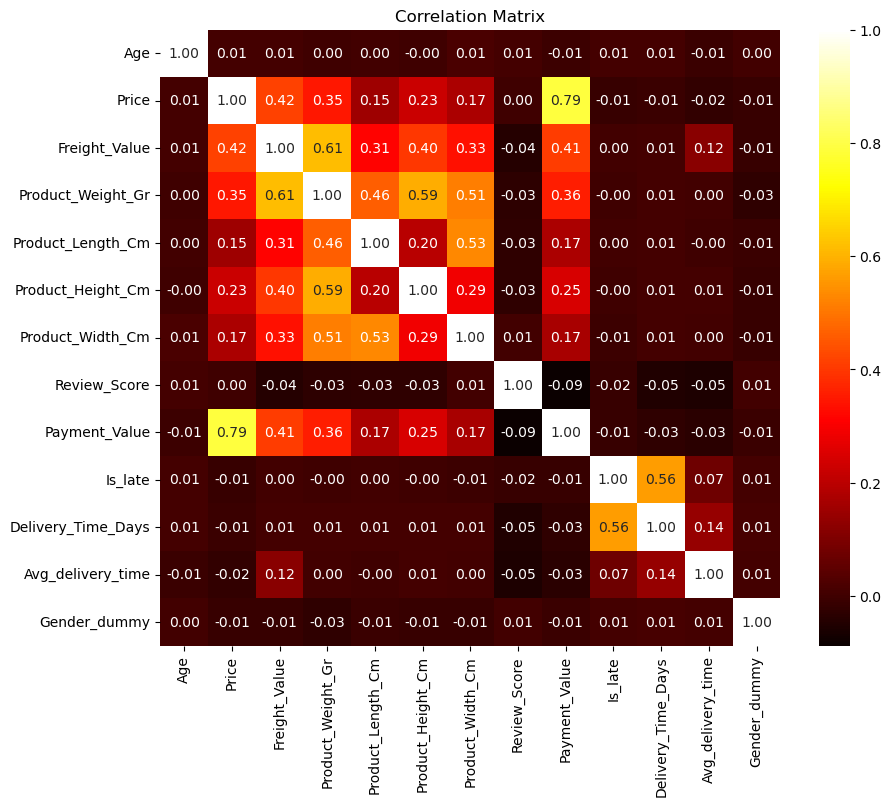

In [115]:
#Computation and visualization the correlation matrix 
correlation = df1.drop(columns=['Has_left_review', 'Gave_Low_Score']).corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="hot", fmt=".2f")
plt.title('Correlation Matrix')


In [721]:
seller_dummies = pd.get_dummies(df1['Seller_Country'], prefix='Seller')
customer_dummies = pd.get_dummies(df1['Customer_Country'], prefix='Customer')
df1 = pd.concat([df1, seller_dummies, customer_dummies], axis=1)

**Hyptothesis testing**


In [751]:
male_scores = df1[df1['Gender'] == 'Male']['Review_Score']
female_scores = df1[df1['Gender'] == 'Female']['Review_Score']

t_stat, p_value = ttest_ind(male_scores, female_scores, nan_policy='omit')
print(f"T-test (Male vs Female): t={t_stat:.2f}, p={p_value:.4f}")


T-test (Male vs Female): t=1.24, p=0.2132


Based on the p-value = 0.2132 we fail to reject the null (no difference in average review scores between males and females) and conclude that we do not have enough evidence to say that male and female review scores are different. This confirms what we have seen above.

In [755]:
late_scores = df1[df1['Is_late'] == 1]['Review_Score']
on_time_scores = df1[df1['Is_late'] == 0]['Review_Score']

t_stat, p_value = ttest_ind(late_scores, on_time_scores, nan_policy='omit')
print(f"T-test (Late vs On-time): t={t_stat:.2f}, p={p_value:.4f}")

T-test (Late vs On-time): t=-9.35, p=0.0000


Based on the results, with a p-value=0.00 we reject the null and conclude that there is a difference in average review scores between late and on-time deliveries

In [763]:
# Spearman correlation test (since we cannot apply Pearson test)
corr, p_value = spearmanr(df1['Age'], df1['Review_Score'])

print(f"Spearman Correlation: r = {corr:.4f}, p = {p_value:.4f}")


Spearman Correlation: r = 0.0101, p = 0.0355


With a p-value=0.0355 we reject the null hypothesis at a 5% level (H0: we have a statistically significant monotonic relationship between age and review score)
What does it mean? This result means that as age increases, the review score tends to either increase or remain stable, but does not decrease.